In [5]:
!pip install yfinance
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
# this is ticker Brent on ICE contract without expiration
ticker = 'BZ=F'

In [9]:
# data with settings
start_date = '2024-01-01'
end_date = pd.Timestamp.now().strftime('%Y-%m-%d')
data_interval = '1d'

In [11]:
data = yf.download(ticker, start=start_date, end=end_date, interval=data_interval)

[*********************100%%**********************]  1 of 1 completed


In [13]:
print(data.tail())

                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2024-06-27  85.250000  86.510002  84.889999  86.389999  86.389999   11216
2024-06-28  86.540001  87.230003  86.290001  86.410004  86.410004   38920
2024-07-01  84.900002  86.879997  84.879997  86.599998  86.599998   55468
2024-07-02  86.690002  87.449997  86.169998  86.239998  86.239998   52311
2024-07-03  86.500000  87.379997  85.889999  87.339996  87.339996   52311


In [15]:
prices=data['Adj Close'].to_numpy()

In [18]:
window_short = 10
window_long = 20
sma_short = np.convolve(prices, np.ones(window_short), 'valid') / window_short
sma_long = np.convolve(prices, np.ones(window_long), 'valid') / window_long

In [21]:
if sma_short[-1] > sma_long[-1]:
    trend = 'Bull'
elif sma_short[-1] < sma_long[-1]:
    trend = 'Bear'
else:
    trend = 'Flat'

print(f"Trend: {trend}")

Trend: Bull


In [24]:
min_indices = np.where(prices == np.min(prices))[0]  # Min
max_index = np.where(prices == np.max(prices[min_indices[0]:min_indices[-1] + 1]))[0]  # Max

In [27]:
x = np.arange(len(prices))  # Индексы дней
A = np.vstack([x[min_indices[0]], np.ones_like(x[min_indices[0]])]).T
m, c = np.linalg.lstsq(A, prices[min_indices[0]:min_indices[-1] + 1], rcond=None)[0]

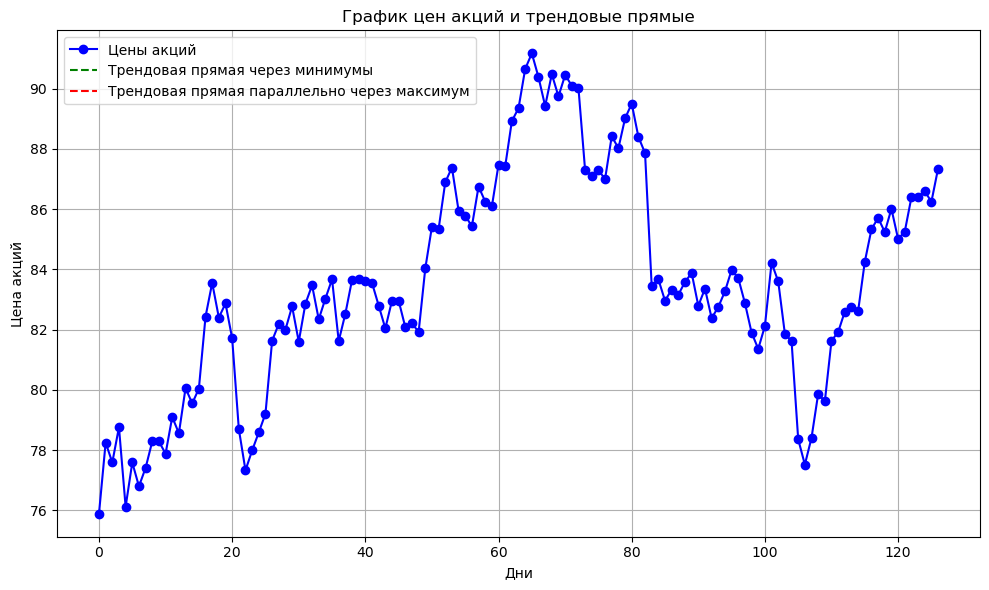

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(x, prices, marker='o', linestyle='-', color='b', label='Цены акций')

# Трендовая прямая через минимумы
plt.plot(x[min_indices], m * x[min_indices] + c, linestyle='--', color='g', label='Трендовая прямая через минимумы')

# Трендовая прямая параллельно через максимум
plt.plot(x[min_indices[0]:max_index[0]+1], m * x[min_indices[0]:max_index[0]+1] + c, linestyle='--', color='r', label='Трендовая прямая параллельно через максимум')

plt.title('График цен акций и трендовые прямые')
plt.xlabel('Дни')
plt.ylabel('Цена акций')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()